In [15]:
import pandas as pd
import os
import FinanceDataReader as fdr
import numpy as np
import math
import sklearn
import sklearn.preprocessing
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm


In [16]:
valid_set_size_percentage = 10 

In [17]:
path = './'
list_name = 'stock_list.csv'
stock_list = pd.read_csv(os.path.join(path,list_name))
stock_list['종목코드'] = stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
stock_list = stock_list.sort_values("종목코드")


In [18]:
data = pd.DataFrame()

start_date = '20200101'
end_date = '20211030'
for stock_code in stock_list["종목코드"]:
    stock = fdr.DataReader(stock_code, start = start_date, end = end_date)
    data = pd.concat([data,stock["Close"]], axis=1)
data.columns = stock_list["종목코드"]
data

종목코드,000060,000080,000100,000120,000150,000240,000250,000270,000660,000670,...,330860,336260,336370,347860,348150,348210,352820,357780,363280,950130
2020-01-02,17150,28900,44305,152500,68900,14000,36350,42500,94700,646000,...,NaN,8635,20650,NaN,NaN,NaN,NaN,NaN,NaN,2120
2020-01-03,17150,28550,44114,148000,68300,13900,35200,42000,94500,658000,...,NaN,8527,22800,NaN,NaN,NaN,NaN,NaN,NaN,2130
2020-01-06,16650,28650,43348,147000,66600,13900,34050,41900,94300,652000,...,NaN,8173,23650,NaN,NaN,NaN,NaN,NaN,NaN,2075
2020-01-07,16400,28450,44114,147000,66300,13950,33850,42050,94000,658000,...,NaN,8056,23400,NaN,NaN,NaN,NaN,NaN,NaN,2080
2020-01-08,16150,27700,43253,143500,64800,13700,32400,41300,97400,644000,...,NaN,7595,23250,NaN,NaN,NaN,NaN,NaN,NaN,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,28850,37200,61200,150000,106000,17250,48550,84300,100000,727000,...,46500.0,50900,83300,36150.0,26600.0,51000.0,326000.0,253300.0,27350.0,17450
2021-10-26,29100,36900,62000,149000,109000,17350,50400,84800,102000,733000,...,46550.0,54500,83100,37650.0,28150.0,52500.0,342000.0,259200.0,27700.0,17750
2021-10-27,29500,35750,61600,148000,108500,17300,49200,85000,101500,721000,...,46400.0,54900,81800,38950.0,27850.0,53700.0,348500.0,264200.0,27500.0,17750
2021-10-28,29100,35300,60800,145500,102500,16650,49000,86000,106500,697000,...,49200.0,50600,80600,37000.0,26250.0,54800.0,333500.0,263800.0,27500.0,17200


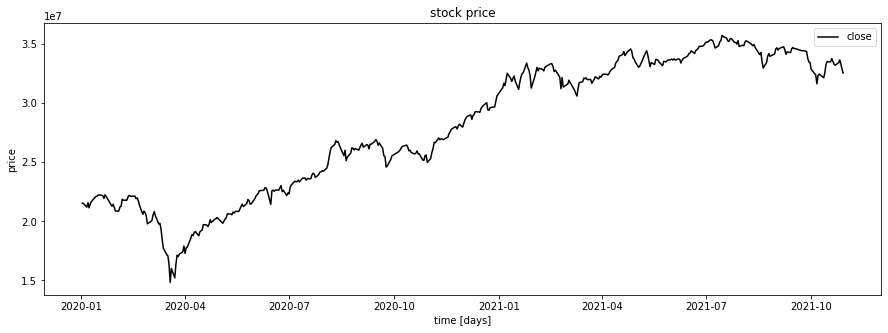

In [19]:
plt.figure(figsize=(15, 5));
plt.plot(data.sum(axis=1), color='black', label='close')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

In [20]:
data

종목코드,000060,000080,000100,000120,000150,000240,000250,000270,000660,000670,...,330860,336260,336370,347860,348150,348210,352820,357780,363280,950130
2020-01-02,17150,28900,44305,152500,68900,14000,36350,42500,94700,646000,...,NaN,8635,20650,NaN,NaN,NaN,NaN,NaN,NaN,2120
2020-01-03,17150,28550,44114,148000,68300,13900,35200,42000,94500,658000,...,NaN,8527,22800,NaN,NaN,NaN,NaN,NaN,NaN,2130
2020-01-06,16650,28650,43348,147000,66600,13900,34050,41900,94300,652000,...,NaN,8173,23650,NaN,NaN,NaN,NaN,NaN,NaN,2075
2020-01-07,16400,28450,44114,147000,66300,13950,33850,42050,94000,658000,...,NaN,8056,23400,NaN,NaN,NaN,NaN,NaN,NaN,2080
2020-01-08,16150,27700,43253,143500,64800,13700,32400,41300,97400,644000,...,NaN,7595,23250,NaN,NaN,NaN,NaN,NaN,NaN,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,28850,37200,61200,150000,106000,17250,48550,84300,100000,727000,...,46500.0,50900,83300,36150.0,26600.0,51000.0,326000.0,253300.0,27350.0,17450
2021-10-26,29100,36900,62000,149000,109000,17350,50400,84800,102000,733000,...,46550.0,54500,83100,37650.0,28150.0,52500.0,342000.0,259200.0,27700.0,17750
2021-10-27,29500,35750,61600,148000,108500,17300,49200,85000,101500,721000,...,46400.0,54900,81800,38950.0,27850.0,53700.0,348500.0,264200.0,27500.0,17750
2021-10-28,29100,35300,60800,145500,102500,16650,49000,86000,106500,697000,...,49200.0,50600,80600,37000.0,26250.0,54800.0,333500.0,263800.0,27500.0,17200


In [21]:
def load_data(stock, seq_len):
    data_raw = stock # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    train_set_size = data.shape[0] - (valid_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:-1,:-1,:]
    y_valid = data[train_set_size:-1,-1,:]
    
    x_test = data[-1,:-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test]

def create_test(prev, pred, seq_len):
    data = np.append(prev, pred)
    data = np.delete(data, 0)
    return data

def normalize_data(stock):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    scaler_list = []
    for stock_name in stock_list["종목코드"]:
        stock[stock_name] = min_max_scaler.fit_transform(stock[stock_name].values.reshape(-1,1))
        scaler_list.append(min_max_scaler)
    return (stock, scaler_list)

In [22]:
data_norm, scaler_list = normalize_data(data)
x_train, y_train, x_valid, y_valid, x_test = load_data(data_norm, 20)

In [23]:
y_train.shape[1]

370

In [24]:
x_train[:,:,1].reshape(-1, 19, 1).shape

(389, 19, 1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

def pred_model(x_train, y_train, x_valid, y_valid, index):
    regressor = Sequential()

    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))

    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')

    regressor.fit(x_train[:, :, index].reshape(-1, 19, 1), y_train[:, index], epochs = 50, batch_size = 32, validation_data=(x_valid[:,:,index].reshape(-1, 19, 1),y_valid[:, index]))
    return regressor

In [ ]:
result = []
for index in tqdm(range(3)):
    pred_list = None
    x = x_test[:, index]
    for j in range(5):
        model = pred_model(x_train, y_train, x_valid, y_valid, index)
        pred = model.predict(x.reshape(1, 19, 1))
        pred = scaler_list[index].inverse_transform(pred)
        x = create_test(x, pred, 20)
        if (j == 0):
            pred_list = pred
        else:
            pred_list = np.append(pred_list, pred)
    result.append(pred_list)
result

  0%|          | 0/3 [00:00<?, ?it/s]2021-11-15 14:31:13.830460: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:81:00.0 name: A100-SXM4-40GB MIG 1g.5gb computeCapability: 8.0
coreClock: 1.41GHz coreCount: 14 deviceMemorySize: 4.75GiB deviceMemoryBandwidth: 1.41TiB/s
2021-11-15 14:31:13.830522: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-15 14:31:13.830542: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-11-15 14:31:13.830554: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2021-11-15 14:31:13.830564: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2021-11-15 14:31:13.830575: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Succ

Epoch 1/50


2021-11-15 14:31:17.489985: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-11-15 14:33:00.521190: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


In [ ]:
sub = pd.read_csv("sample_submission.csv")
for i in range(1,371):
    sub.iloc[:, i] = np.pad(result[i - 1] * 100000, (0, 5), 'constant', constant_values=0)


In [ ]:
sub.to_csv("1.csv", index=0)